<a href="https://colab.research.google.com/github/jonathanmendoza-tx/DS-Unit-1-Sprint-4-Linear-Algebra/blob/master/Jonathan_Mendoza_Linear_Algebra_Sprint_Challenge_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Linear Algebra

## 1.1 Graph vector $\vec{a}$ 

\begin{align}
\vec{a} = \begin{bmatrix} 3 \\ 2 \end{bmatrix}
\end{align}

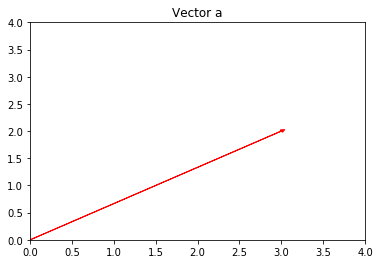

In [1]:
import matplotlib.pyplot as plt

vec_a = [3,2]

plt.arrow(0,0,vec_a[0],vec_a[1],head_width=.05, head_length=0.05, color = 'r')
plt.ylim(0,4)
plt.xlim(0,4)
plt.title('Vector a')
plt.show()

## 1.2 Find $||\vec{b}||$. What does the norm of a vector represent?
\begin{align}
\vec{b} = \begin{bmatrix} 17 & -4 & -2 & 1\end{bmatrix}
\end{align}


In [2]:
import numpy as np

vec_b = np.array([17,-4,-2,1])

mag_b = np.dot(vec_b,vec_b)**.5
print(f'The magnitude of vector b is: {mag_b}')

The magnitude of vector b is: 17.60681686165901


The norm of a vector represents the length of a vector in normalized space

## 1.3 Find $\vec{c} \cdot \vec{d}$ - Are these vectors orthogonal? Why or why not?

\begin{align}
\vec{c} = \begin{bmatrix}3 & 7 & -2 & 12\end{bmatrix}
\qquad
\vec{d} = \begin{bmatrix}9 & -7 & 4 & 6\end{bmatrix}
\end{align}

In [3]:
vec_c = np.array([3,7,-2,12])
vec_d = np.array([9,-7,4,6])

c_dot_d = np.dot(vec_c,vec_d)

print(f'The dot product between vectors c and d is: {c_dot_d}')

The dot product between vectors c and d is: 42


The vectors are neither orthogonal nor perpendicular, this can be verified by the dot product's value of 42. Orthogonality requires that the dot product between the vectors equals zero, which is not the case here.

## 1.4 Find $E^{-1}$ and $E^{T}$

\begin{align}
E = 
\begin{bmatrix}
    7 & 4 & 2 \\
    1 & 3 & -1 \\
    2 & 6 & -4
\end{bmatrix}
\end{align}

In [4]:
import numpy.linalg

matrix_e = np.array([[7,4,2],[1,3,-1],[2,6,-4]])

e_inv = np.linalg.inv(matrix_e)
e_trans = matrix_e.T

print(f'E inverse is: \n{e_inv}\n E transpose is:\n{e_trans}')


E inverse is: 
[[ 0.17647059 -0.82352941  0.29411765]
 [-0.05882353  0.94117647 -0.26470588]
 [ 0.          1.         -0.5       ]]
 E transpose is:
[[ 7  1  2]
 [ 4  3  6]
 [ 2 -1 -4]]


# Intermediate Linear Algebra

## 2.1 Suppose that the number of customers at a ski resort as well as the number of inches of fresh powder (snow)  was recorded for 7 days. 

### Customers: [820, 760, 1250, 990, 1080, 1450, 1600]

### Inches of new snow: [0, 1, 7, 1, 0, 6, 4 ]

## Find the mean, variance, and standard deviation for both the number of customers and inches of new snow for the week. You may use library functions, dataframes, .describe(), etc. 



In [6]:
import pandas as pd

customers = [820, 760, 1250, 990, 1080, 1450, 1600]
snow = [0, 1, 7, 1, 0, 6, 4]

df = pd.DataFrame({'customers': customers, 'snow': snow})

df.head()

,customers,snow
0,820,0
1,760,1
2,1250,7
3,990,1
4,1080,0


In [14]:
means = df.mean()
stddev = df.std()
var = df.var()
print(f'Mean values:\n{means}\n \nStandard deviations:\n{stddev}\n \nVariances:\n{var}')

Mean values:
customers    1135.714286
snow            2.714286
dtype: float64
 
Standard deviations:
customers    314.264069
snow           2.927700
dtype: float64
 
Variances:
customers    98761.904762
snow             8.571429
dtype: float64


## 2.2 Are the variances of the number of customers and inches of snow comparable? 
## Why or why not? 

No, because they are on a different scales, which would cause problems with weighting each variable

## 2.3 Find the variance-covariance matrix for the number of customers and inches of snow at the ski resort. 

In [15]:
centered = df.copy()
columns = centered.columns

for i in range(len(columns)): #for loop to normalize each column
  centered[columns[i]] = (centered[columns[i]]- centered[columns[i]].mean())/centered[columns[i]].std()

centered.head()

,customers,snow
0,-1.004615,-0.927105
1,-1.195537,-0.585540
2,0.363661,1.463850
3,-0.463668,-0.585540
4,-0.177285,-0.927105


In [16]:
centered.cov()

,customers,snow
customers,1.000000,0.728463
snow,0.728463,1.000000


# PCA

## 3.1 Standardize the data so that it has a mean of 0 and a standard deviation of 1. (You may use library functions)

We have included some code to get you started so that you don't get stuck on something that isn't standardizing the data or PCA.

This might be helpful:

<https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html>

In [17]:
# Let me get you some data to start you off.
import pandas as pd

data = {"Country": ["England","Wales","Scotland","North Ireland"], 
        "Cheese": [105,103,103,66], 
        "Carcass_Meat": [245,227,242,267], 
        "Other_Meat": [685, 803, 750, 586], 
        "Fish": [147, 160, 122, 93], 
        "Fats_and_Oils": [193, 235, 184, 209], 
        "Sugars": [156, 175, 147, 139], 
        "Fresh_Potatoes": [720, 874, 566, 1033], 
        "Fresh_Veg": [253, 265, 171, 143], 
        "Other_Veg": [488, 570, 418, 355], 
        "Processed_Potatoes": [198, 203, 220, 187], 
        "Processed_Veg": [360, 365, 337, 334], 
        "Fresh_Fruit": [1102, 1137, 957, 674], 
        "Cereals": [1472, 1582, 1462, 1494], 
        "Beverages": [57,73,53,47], 
        "Soft_Drinks": [1374, 1256, 1572, 1506], 
        "Alcoholic Drinks": [375, 475, 458, 135], 
        "Confectionery": [54, 64, 62, 41]}

df = pd.DataFrame(data)

# Look at the data
df.head()

,Country,Cheese,Carcass_Meat,Other_Meat,Fish,Fats_and_Oils,Sugars,Fresh_Potatoes,Fresh_Veg,Other_Veg,Processed_Potatoes,Processed_Veg,Fresh_Fruit,Cereals,Beverages,Soft_Drinks,Alcoholic Drinks,Confectionery
0,England,105,245,685,147,193,156,720,253,488,198,360,1102,1472,57,1374,375,54
1,Wales,103,227,803,160,235,175,874,265,570,203,365,1137,1582,73,1256,475,64
2,Scotland,103,242,750,122,184,147,566,171,418,220,337,957,1462,53,1572,458,62
3,North Ireland,66,267,586,93,209,139,1033,143,355,187,334,674,1494,47,1506,135,41


In [23]:
from sklearn.preprocessing import StandardScaler


features = df.columns[1:]

# getting x and y components

x = df.loc[:, features].values

y = df.loc[:,['Country']].values 

x = StandardScaler().fit_transform(x) # standardizing x

x

array([[ 0.65827466, -0.01749546, -0.25954622,  0.64458535, -0.63242919,
         0.13055067, -0.45007561,  0.86331183,  0.37773603, -0.33626508,
         0.80547723,  0.73740709, -0.64432226, -0.05191741, -0.43523112,
         0.10499766, -0.13830319],
       [ 0.53580495, -1.27716878,  1.19885635,  1.15244047,  1.53589947,
         1.54795798,  0.43569619,  1.09352832,  1.40168163,  0.08406627,
         1.17160324,  0.9292974 ,  1.67946294,  1.60943981, -1.40423624,
         0.84182336,  0.96812236],
       [ 0.53580495, -0.22744102,  0.54381113, -0.33205912, -1.09707105,
        -0.54085279, -1.33584741, -0.70983418, -0.49636387,  1.51319287,
        -0.87870243, -0.0575671 , -0.85557546, -0.46725672,  1.19072664,
         0.71656299,  0.74683725],
       [-1.72988456,  1.52210526, -1.48312126, -1.4649667 ,  0.19360077,
        -1.13765587,  1.35022682, -1.24700598, -1.28305378, -1.26099406,
        -1.09837804, -1.60913739, -0.17956522, -1.09026568,  0.64874072,
        -1.66338402

## 3.2 Perform PCA on the data and graph Principal Component 1 against Principal Component 2. (You may use library functions)

This might be helpful:

<https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html>

In [30]:
from sklearn.decomposition import PCA

pca = PCA(2)

pcomponents = pca.fit_transform(x)

p_df = pd.DataFrame(data = pcomponents, columns = ['p1', 'p2'])
p_df.head()

,p1,p2
0,-0.954490,0.328318
1,-4.520951,-1.735380
2,0.487978,3.233672
3,4.987462,-1.826611


In [34]:
final = pd.concat([p_df, df[['Country']]], axis = 1)
final

,p1,p2,Country
0,-0.954490,0.328318,England
1,-4.520951,-1.735380,Wales
2,0.487978,3.233672,Scotland
3,4.987462,-1.826611,North Ireland


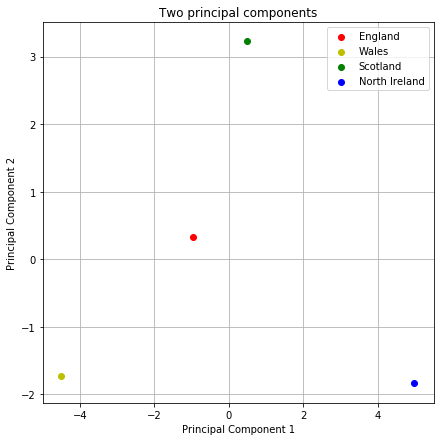

In [62]:
fig = plt.figure(figsize = (7,7))

ax = fig.add_subplot(1,1,1) 

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')

ax.set_title('Two principal components')

countries = list(final['Country'].values)

colors = ['r', 'y', 'g', 'b']

for countries, color in zip(countries,colors):
    indices = final['Country'] == countries
    ax.scatter(final.loc[indices, 'p1'], final.loc[indices, 'p2'], c = color)
ax.legend(['England', 'Wales', 'Scotland', 'North Ireland'])
ax.grid()

# Clustering

## 4.1 Use K-Means to cluster the following data and then graph your results. (You may use library functions)

We have included some code to get you started so that you don't get stuck on something that isn't standardizing clustering.

Prioritize calculating the clusters over graphing them. 

Scikit-Learn K-Means Documentation:

<https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html>

In [79]:
points = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/points.csv')
points.head()

,x,y
0,-7.846803,-3.421277
1,-3.554323,-6.884729
2,-0.192822,-9.671030
3,-6.401456,-5.223972
4,-0.804026,-9.704457


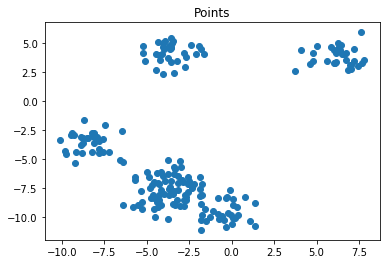

In [93]:
plt.scatter(points['x'], points['y'])
plt.title('Points')
plt.show()

Dataset appears to have 5 distinct clusters

In [81]:
from sklearn.cluster import KMeans 

kmeans = KMeans(n_clusters=5) #chose 5 because of how data appears to be clustered
kmeans.fit(points)
labels = kmeans.labels_ #create labels

new_series = pd.Series(labels) #append cluster labels to dataframe
points['clusters'] = new_series.values
points.head()

,x,y,clusters
0,-7.846803,-3.421277,3
1,-3.554323,-6.884729,4
2,-0.192822,-9.671030,0
3,-6.401456,-5.223972,3
4,-0.804026,-9.704457,0


In [95]:
#gets the mean of each grouped feature to calculate each cluster's centroid
centroids = points.groupby('clusters').mean()
centroids

,x,y
clusters,,
0,-0.476115,-9.494754
1,-3.597407,4.133441
2,6.249793,3.844572
3,-8.366530,-3.612381
4,-3.780539,-7.605906


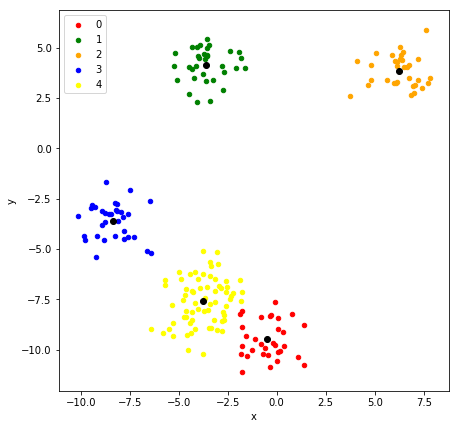

In [94]:
#graph clusters and their centroids
colors = {0:'red', 1:'green', 2:'orange', 3:'blue', 4:'yellow'}
fig, ax = plt.subplots(figsize = (7,7))
ax.plot(centroids.iloc[0].x, centroids.iloc[0].y, "ok")
ax.plot(centroids.iloc[1].x, centroids.iloc[1].y, "ok")
ax.plot(centroids.iloc[2].x, centroids.iloc[2].y, "ok")
ax.plot(centroids.iloc[3].x, centroids.iloc[3].y, "ok")
ax.plot(centroids.iloc[4].x, centroids.iloc[4].y, "ok")
grouped = points.groupby('clusters')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()